## Trực quan hóa dữ liệu
---

In [1]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
zip_path = "data/data - data.csv.zip"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    csv_filename = [f for f in zip_ref.namelist() if f.endswith('.csv')][0]

    with zip_ref.open(csv_filename) as csv_file:
        df = pd.read_csv(csv_file)
df.drop(columns=['Unnamed: 3'], inplace=True)

### xem vài dòng đầu

In [11]:
df.head()

,comment,label,rate
0,Áo bao đẹp ạ!!,POS,5
1,Tuyệt vời !,POS,5
2,2day ao khong giong trong.,NEG,1
3,"Mùi thơm,bôi lên da mềm da.",POS,5
4,"Vải đẹp, dày dặn.",POS,5


### Thông tin tổng quan.

- Thông tin chung

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31460 entries, 0 to 31459
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  31460 non-null  object
 1   label    31460 non-null  object
 2   rate     31460 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 737.5+ KB
None


- Tổng số dòng bị thiếu.

In [19]:
print(df.isnull().sum())

comment    0
label      0
rate       0
dtype: int64


### Phân phối các nhãn cảm xúc

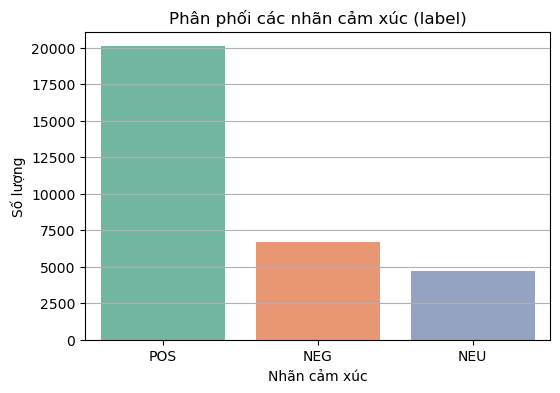

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="label", hue="label", palette="Set2", legend=False)
plt.title("Phân phối các nhãn cảm xúc (label)")
plt.xlabel("Nhãn cảm xúc")
plt.ylabel("Số lượng")
plt.grid(axis='y')
plt.show()

In [20]:
# Tính số lượng mẫu mỗi nhãn
label_counts = df['label'].value_counts()

# Tính % mỗi nhãn
label_percents = df['label'].value_counts(normalize=True) * 100

# Tạo bảng tổng hợp
distribution_df = pd.DataFrame({
    'Số lượng': label_counts,
    'Tỷ lệ (%)': label_percents.round(2)
})

print(distribution_df)


       Số lượng  Tỷ lệ (%)
label                     
POS       20093      63.87
NEG        6669      21.20
NEU        4698      14.93


### Phân phối điểm số đánh giá (rate)

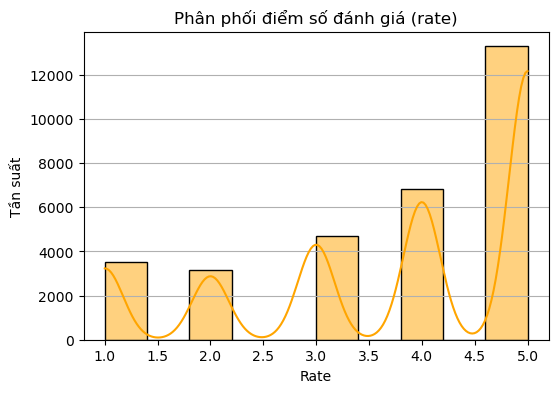

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df['rate'], bins=10, kde=True, color='orange')
plt.title("Phân phối điểm số đánh giá (rate)")
plt.xlabel("Rate")
plt.ylabel("Tần suất")
plt.grid(axis="y")
plt.show()

### Boxplot để thấy sự phân bố rate theo từng nhãn cảm xúc.

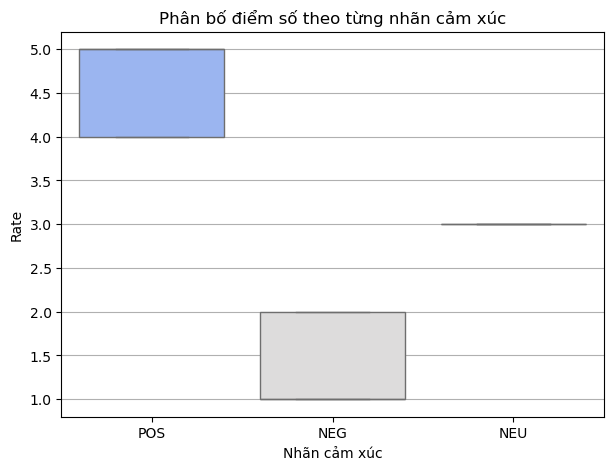

In [18]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='label', y='rate', hue='label', palette='coolwarm', dodge=False, legend=False)
plt.title("Phân bố điểm số theo từng nhãn cảm xúc")
plt.xlabel("Nhãn cảm xúc")
plt.ylabel("Rate")
plt.grid(axis='y')
plt.show()